In [63]:
from pronto import Ontology
import pandas as pd
import numpy as np
from tqdm import tqdm

In [4]:
# obo 파일을 로드함

go = Ontology("/home/user01/project_codes/common_data/gene_ontology/go-basic.obo")

In [5]:
# 특정 term 의 relation 들을 구하기

fff=[]
def funcc(one_term):
  
  # 특정 term 에서 is-a 관계에 있는 모든 부모 term 들을 구함
  elements=list(one_term[1].superclasses(1))
  # is_a 표시를 함
  elements=[['is_a',i] for i in elements]
  # 특정 term 에서 part-of 관계에 있는 모든 부모 term 들을 구함
  elements2=list(one_term[1].objects(go.get_relationship('part_of')))
  # part_of 표시를 함
  elements2=[['part_of',i] for i in elements2]
  # 구한 리스트들을 통합함
  elements3=elements+elements2

  for idx,ele in enumerate(elements3):
    # 첫번째 term 은 프로세싱에서 제외함
    if ele[1].id==one_term[1].id:
      continue
    # 두개의 term 을 연결함
    fff.append([one_term[1].id,ele[1].id,ele[0]])
    # 현재 프로세싱 되고 있는 term 이 시작 term 이 됐을 때, 이 함수를 재귀적으로 호출함
    funcc(ele)

# Term 1
# funcc(['start',go['GO:0001845']])
# Term 2
funcc(['start',go['GO:0021915']])
fff

<ipython-input-5-aa7dc0fdbb8b>:9: NotImplementedWarning: `Term.objects` is not semantically correct, most of the logic rules have not been implemented. Consider using an actual reasoner instead.
  elements2=list(one_term[1].objects(go.get_relationship('part_of')))


[['GO:0021915', 'GO:0035295', 'is_a'],
 ['GO:0035295', 'GO:0048856', 'is_a'],
 ['GO:0048856', 'GO:0032502', 'is_a'],
 ['GO:0032502', 'GO:0008150', 'is_a'],
 ['GO:0035295', 'GO:0007275', 'part_of'],
 ['GO:0007275', 'GO:0032501', 'is_a'],
 ['GO:0032501', 'GO:0008150', 'is_a'],
 ['GO:0007275', 'GO:0048856', 'is_a'],
 ['GO:0048856', 'GO:0032502', 'is_a'],
 ['GO:0032502', 'GO:0008150', 'is_a'],
 ['GO:0021915', 'GO:0060429', 'is_a'],
 ['GO:0060429', 'GO:0009888', 'is_a'],
 ['GO:0009888', 'GO:0048856', 'is_a'],
 ['GO:0048856', 'GO:0032502', 'is_a'],
 ['GO:0032502', 'GO:0008150', 'is_a'],
 ['GO:0021915', 'GO:0007399', 'part_of'],
 ['GO:0007399', 'GO:0048731', 'is_a'],
 ['GO:0048731', 'GO:0048856', 'is_a'],
 ['GO:0048856', 'GO:0032502', 'is_a'],
 ['GO:0032502', 'GO:0008150', 'is_a'],
 ['GO:0048731', 'GO:0007275', 'part_of'],
 ['GO:0007275', 'GO:0032501', 'is_a'],
 ['GO:0032501', 'GO:0008150', 'is_a'],
 ['GO:0007275', 'GO:0048856', 'is_a'],
 ['GO:0048856', 'GO:0032502', 'is_a'],
 ['GO:0032502', 

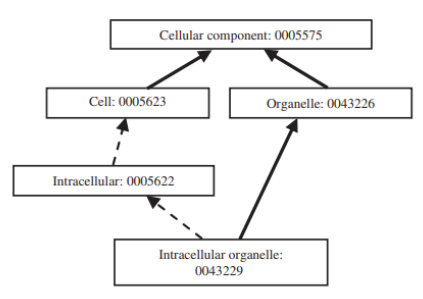

In [6]:
# 중복 row 를 제거함
aaa=pd.DataFrame(fff).drop_duplicates(keep='first')
aaa

,0,1,2
0,GO:0021915,GO:0035295,is_a
1,GO:0035295,GO:0048856,is_a
2,GO:0048856,GO:0032502,is_a
3,GO:0032502,GO:0008150,is_a
4,GO:0035295,GO:0007275,part_of
5,GO:0007275,GO:0032501,is_a
6,GO:0032501,GO:0008150,is_a
7,GO:0007275,GO:0048856,is_a
10,GO:0021915,GO:0060429,is_a
11,GO:0060429,GO:0009888,is_a


위와 같은 데이터를 얻게되면, 아래와 같이 Directed Acyclic Graph 구조를 그릴 수 있음, Gephi 네트워크 분석 도구로 그림

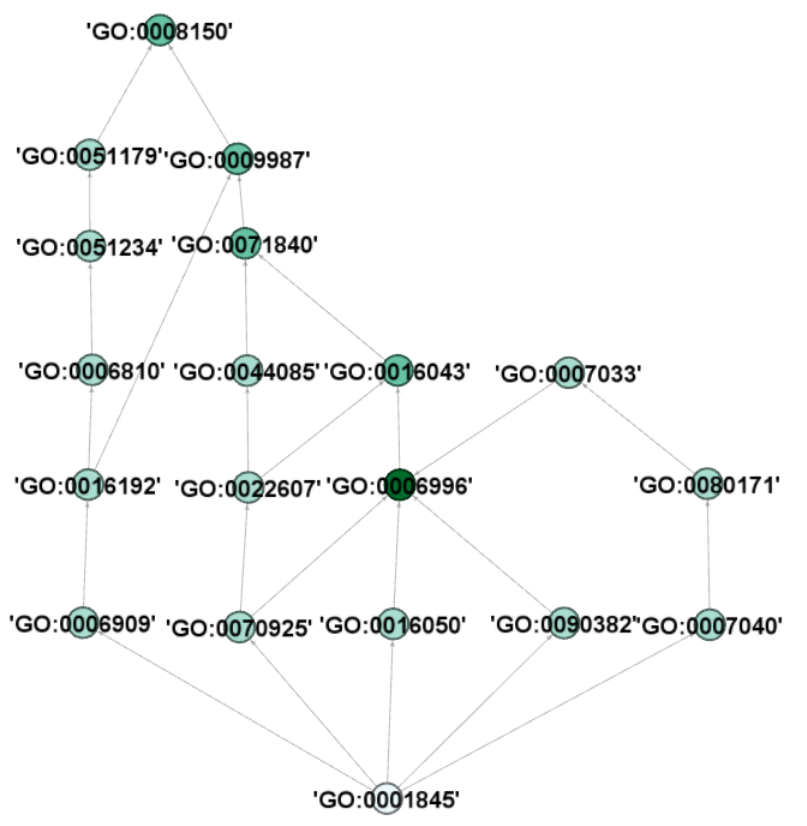

In [7]:
# Print unique terms
pd.concat([aaa[0],aaa[1]]).unique()

array(['GO:0021915', 'GO:0035295', 'GO:0048856', 'GO:0032502',
       'GO:0007275', 'GO:0032501', 'GO:0060429', 'GO:0009888',
       'GO:0007399', 'GO:0048731', 'GO:0043009', 'GO:0009792',
       'GO:0009790', 'GO:0008150'], dtype=object)

In [8]:
# Terms which are connected to the starting term
proc0=aaa[aaa[0]=='GO:0021915']
proc0

,0,1,2
0,GO:0021915,GO:0035295,is_a
10,GO:0021915,GO:0060429,is_a
15,GO:0021915,GO:0007399,part_of
26,GO:0021915,GO:0043009,part_of


In [9]:
# semantic contribution factor w_e 함수 구현
def scorer_func1(x):
  if x[2]=='is_a':
    return 0.8
  elif x[2]=='part_of':
    return 0.6
proc0['score']=proc0.apply(scorer_func1,axis=1)
proc0

<ipython-input-9-94dcb4256971>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proc0['score']=proc0.apply(scorer_func1,axis=1)


,0,1,2,score
0,GO:0021915,GO:0035295,is_a,0.8
10,GO:0021915,GO:0060429,is_a,0.8
15,GO:0021915,GO:0007399,part_of,0.6
26,GO:0021915,GO:0043009,part_of,0.6


In [10]:
# 프로세싱 하기 용이하도록, 파이썬 dictionary 로 데이터를 변환함
key_list=proc0[1]
value_list=proc0['score']
score_dict = {k:v for k,v in zip(key_list,value_list)}
score_dict

{'GO:0035295': 0.8, 'GO:0060429': 0.8, 'GO:0007399': 0.6, 'GO:0043009': 0.6}

In [11]:
# S-value 구하는 함수
def process_funcc():
  prev_len_of_score_dict=len(score_dict)
  aa=aaa.loc[aaa[0].isin(list(score_dict.keys())),:]

  def scorer_func2(x):
    prev_score=score_dict[x[0]]
    if x[2]=='is_a':
      return round(prev_score*0.8,2)
    elif x[2]=='part_of':
      return round(prev_score*0.6,2)

  aa['score']=aa.apply(scorer_func2,axis=1)
  # score 로는 내림차순 정렬
  aa=aa.sort_values(by=[1,'score'],axis=0,ascending=[True,False])
  # 첫번째를 선택하면, max score 가 선택됨
  aa2=aa.drop_duplicates(subset=[1],keep='first')
  key_list=aa2[1]
  value_list=aa2['score']
  for k,v in zip(key_list,value_list):
    score_dict[k]=v

  after_len_of_score_dict=len(score_dict)

  if after_len_of_score_dict-prev_len_of_score_dict==0:
    return 0

  process_funcc()

process_funcc()

<ipython-input-11-652ebf503e51>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa['score']=aa.apply(scorer_func2,axis=1)


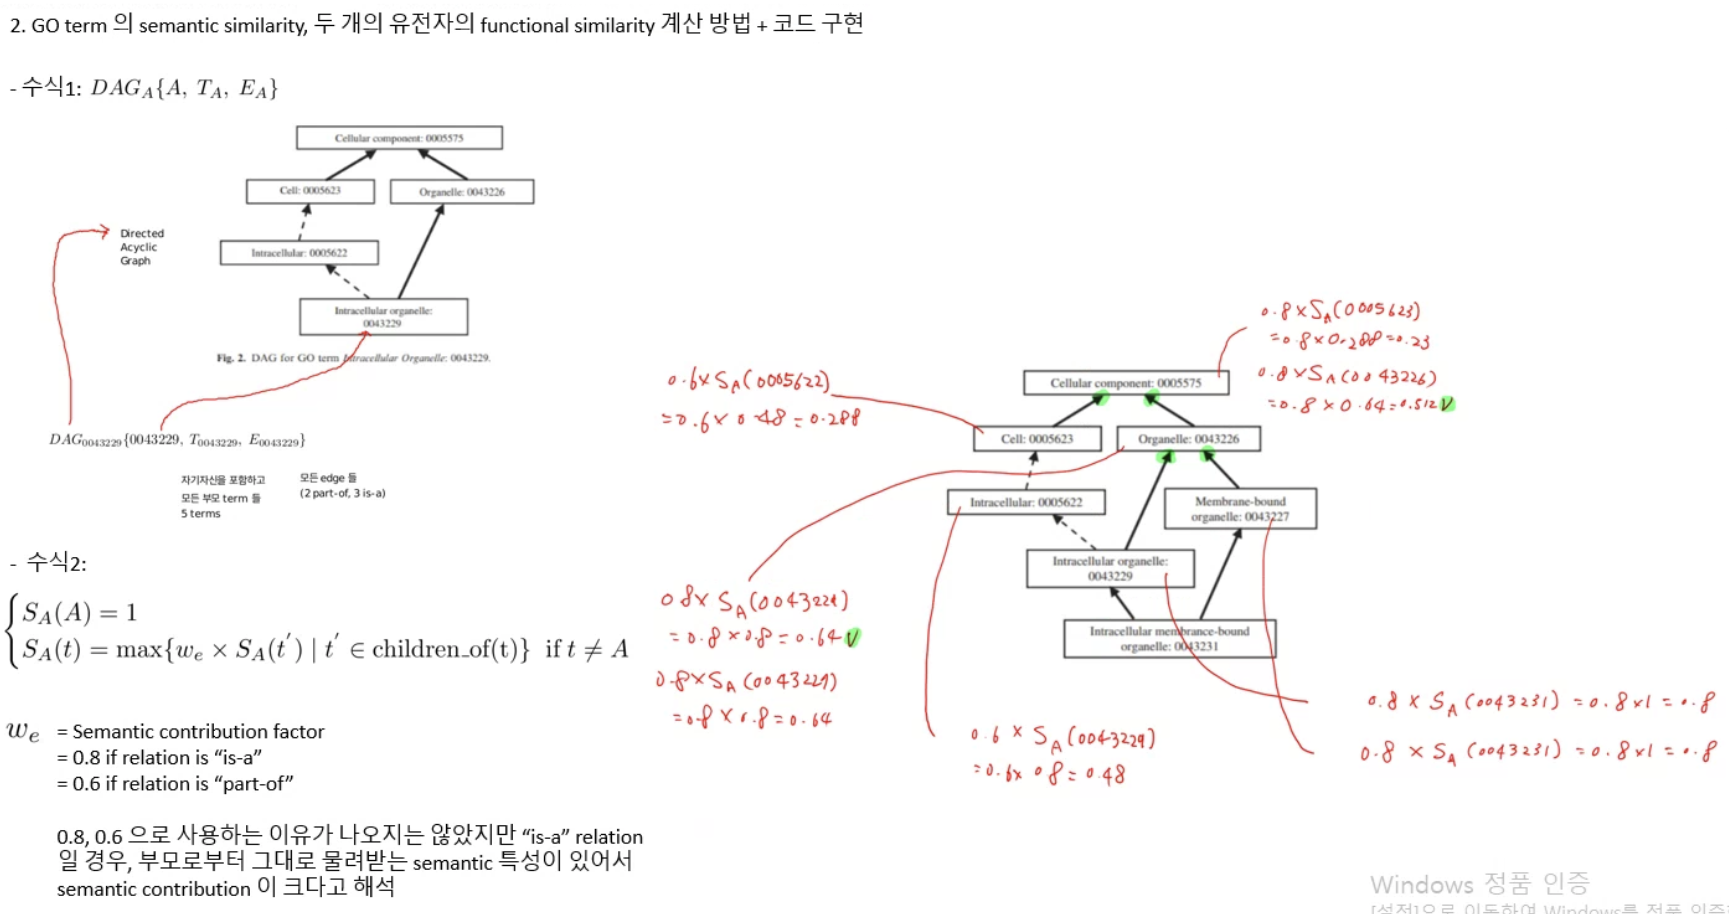

In [12]:
score_dict

{'GO:0035295': 0.8,
 'GO:0060429': 0.8,
 'GO:0007399': 0.6,
 'GO:0043009': 0.6,
 'GO:0007275': 0.48,
 'GO:0009792': 0.48,
 'GO:0009888': 0.64,
 'GO:0048731': 0.48,
 'GO:0048856': 0.64,
 'GO:0009790': 0.38,
 'GO:0032501': 0.38,
 'GO:0032502': 0.51,
 'GO:0008150': 0.41}

In [14]:
# Copy and paste data of above score dict here

# S_A(t)
term_A_data={'GO:0007040': 0.8,
 'GO:0016050': 0.8,
 'GO:0070925': 0.8,
 'GO:0006909': 0.6,
 'GO:0090382': 0.6,
 'GO:0006996': 0.64,
 'GO:0016192': 0.48,
 'GO:0022607': 0.64,
 'GO:0080171': 0.64,
 'GO:0006810': 0.38,
 'GO:0007033': 0.51,
 'GO:0009987': 0.38,
 'GO:0016043': 0.51,
 'GO:0044085': 0.38,
 'GO:0008150': 0.3,
 'GO:0051234': 0.3,
 'GO:0071840': 0.41,
 'GO:0051179': 0.24}

# S_B(t)
term_B_data={'GO:0035295': 0.8,
 'GO:0060429': 0.8,
 'GO:0007399': 0.6,
 'GO:0043009': 0.6,
 'GO:0007275': 0.48,
 'GO:0009792': 0.48,
 'GO:0009888': 0.64,
 'GO:0048731': 0.48,
 'GO:0048856': 0.64,
 'GO:0009790': 0.38,
 'GO:0032501': 0.38,
 'GO:0032502': 0.51,
 'GO:0008150': 0.41}

term_A_d={'id':list(term_A_data.keys()),
   'score':list(term_A_data.values())}
term_B_d={'id':list(term_B_data.keys()),
   'score':list(term_B_data.values())}

term_A_df=pd.DataFrame(term_A_d)
term_B_df=pd.DataFrame(term_B_d)

In [15]:
display(term_A_df)
display(term_B_df)

,id,score
0,GO:0007040,0.80
1,GO:0016050,0.80
2,GO:0070925,0.80
3,GO:0006909,0.60
4,GO:0090382,0.60
5,GO:0006996,0.64
6,GO:0016192,0.48
7,GO:0022607,0.64
8,GO:0080171,0.64
9,GO:0006810,0.38


,id,score
0,GO:0035295,0.80
1,GO:0060429,0.80
2,GO:0007399,0.60
3,GO:0043009,0.60
4,GO:0007275,0.48
5,GO:0009792,0.48
6,GO:0009888,0.64
7,GO:0048731,0.48
8,GO:0048856,0.64
9,GO:0009790,0.38


In [16]:
# 분자의 교집합 부분 구하기
term_AB_df=pd.merge(term_A_df,term_B_df,on=['id'],how='inner')
term_AB_df

,id,score_x,score_y
0,GO:0008150,0.3,0.41


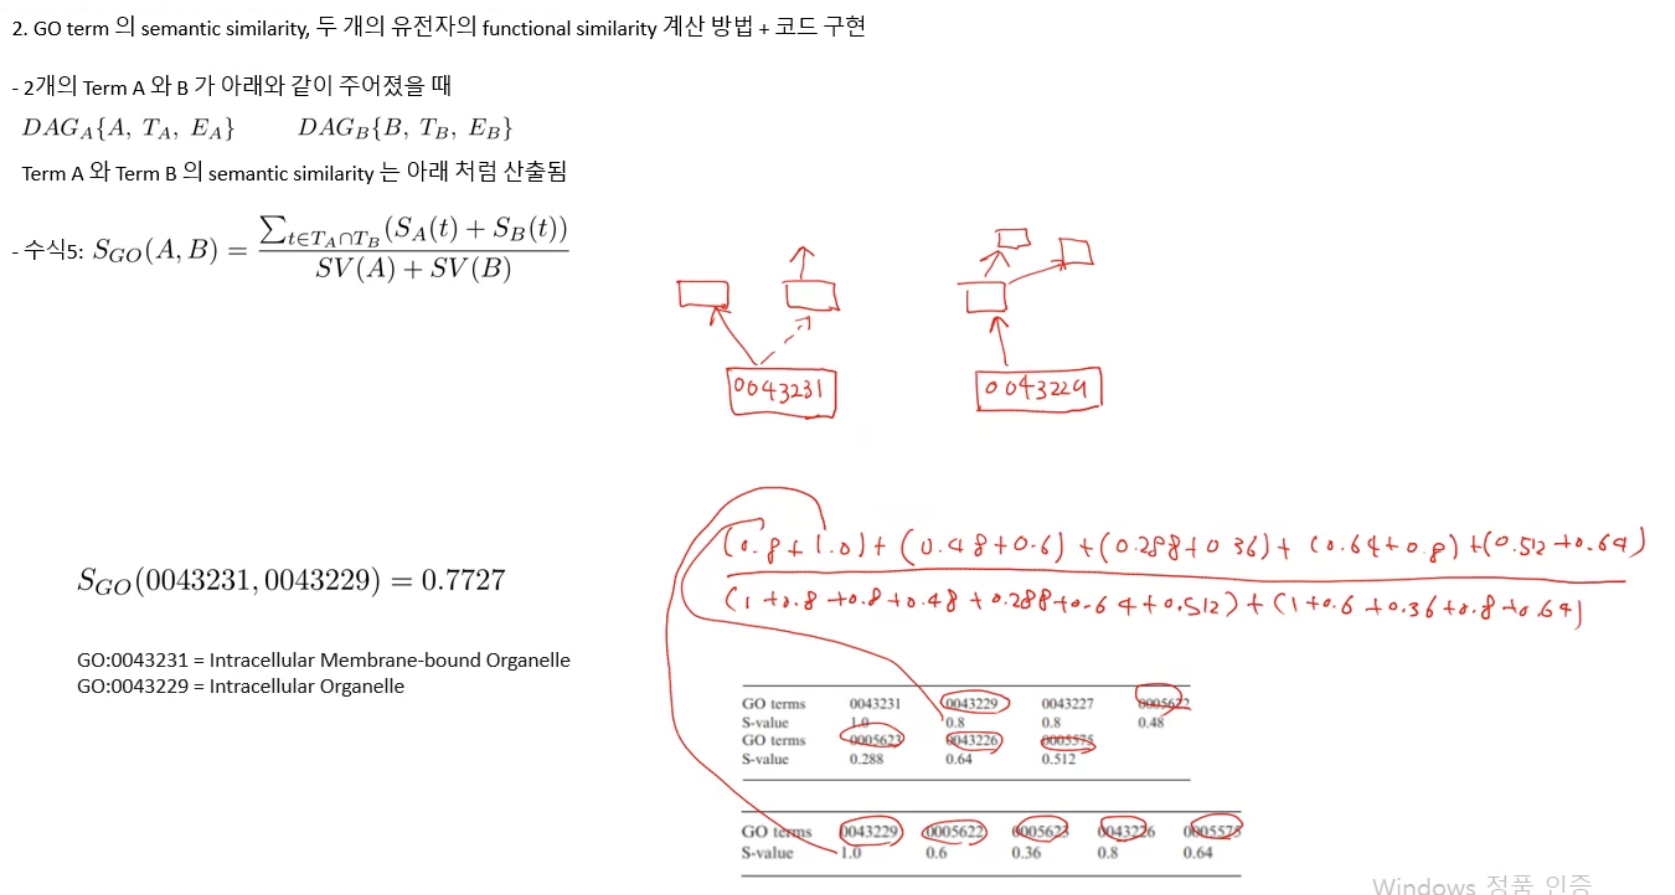

In [17]:
# 분자의 교집합 부분 / { SV(A) + SV(B) }
term_AB_df.sum(axis=1).sum(axis=0) / (  np.array(list(term_A_data.values())).sum()  +  np.array(list(term_B_data.values())).sum()  )

0.042745334136062615

위의 값은 GO:0001845 (phagolysosome assembly) term 과 GO:0021915 (neural tube development) term 의 semantic similarity 값임

In [18]:
# 두 유전자의 functional similarity 계산 실험


# 실험에 사용할 Gene annotation 데이터
# Homo sapiens 종
# protein 종류
# goa_human.gaf
# from http://current.geneontology.org/products/pages/downloads.html

# RGL3 유전자의 annotaion terms
# GO:0005085
# GO:0005515
# GO:0007264
# GO:0043547
# GO:0005829

# HS1BP3 유전자의 annotaion terms
# GO:0005515
# GO:0035091
# GO:0042981
# GO:0005739
# GO:0005783

In [72]:
terms_for_gene1=['GO:0005085','GO:0005515','GO:0007264','GO:0043547','GO:0005829']
terms_for_gene2=['GO:0005515','GO:0035091','GO:0042981','GO:0005739','GO:0005783']

# 아래 그림과 같은 계산을 하기위한 데이터 구조 만들기

temp1=[]
for one_term_for_gene1 in terms_for_gene1:
  for one_term_for_gene2 in terms_for_gene2:
    temp1.append([one_term_for_gene1,one_term_for_gene2])

temp2=[]
for one_term_for_gene2 in terms_for_gene2:
  for one_term_for_gene1 in terms_for_gene1:
    temp2.append([one_term_for_gene2,one_term_for_gene1])

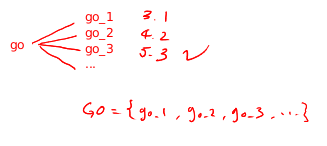

In [76]:
temp1

[['GO:0005085', 'GO:0005515'],
 ['GO:0005085', 'GO:0035091'],
 ['GO:0005085', 'GO:0042981'],
 ['GO:0005085', 'GO:0005739'],
 ['GO:0005085', 'GO:0005783'],
 ['GO:0005515', 'GO:0005515'],
 ['GO:0005515', 'GO:0035091'],
 ['GO:0005515', 'GO:0042981'],
 ['GO:0005515', 'GO:0005739'],
 ['GO:0005515', 'GO:0005783'],
 ['GO:0007264', 'GO:0005515'],
 ['GO:0007264', 'GO:0035091'],
 ['GO:0007264', 'GO:0042981'],
 ['GO:0007264', 'GO:0005739'],
 ['GO:0007264', 'GO:0005783'],
 ['GO:0043547', 'GO:0005515'],
 ['GO:0043547', 'GO:0035091'],
 ['GO:0043547', 'GO:0042981'],
 ['GO:0043547', 'GO:0005739'],
 ['GO:0043547', 'GO:0005783'],
 ['GO:0005829', 'GO:0005515'],
 ['GO:0005829', 'GO:0035091'],
 ['GO:0005829', 'GO:0042981'],
 ['GO:0005829', 'GO:0005739'],
 ['GO:0005829', 'GO:0005783']]

In [57]:
# 아래와 같은 수식을 구현함

# max[GO:0005085,{GO:0005515,GO:0035091,GO:0042981,GO:0005739,GO:0005783}] + 
# max[GO:0005515,{GO:0005515,GO:0035091,GO:0042981,GO:0005739,GO:0005783}] + ...
# +
# max[GO:0005515,{GO:0005085,GO:0005515,GO:0007264,GO:0043547,GO:0005829}] + 
# max[GO:0035091,{GO:0005085,GO:0005515,GO:0007264,GO:0043547,GO:0005829}] + ...

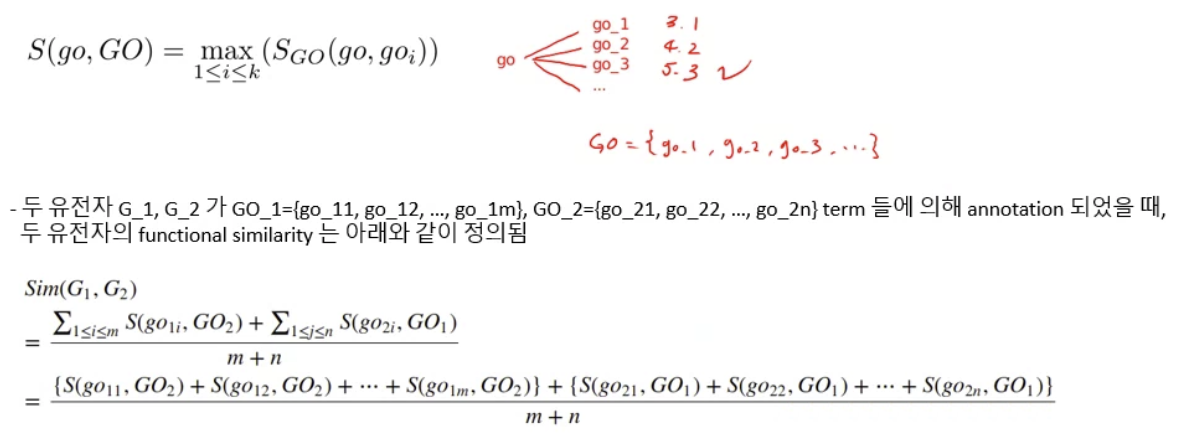

In [77]:
# 두 유전자의 functional similairty 구하기

def semantic_similarity_of_two_terms(term1,term2):
  fff=[]  
  def funcc(one_term):
    
    # 위의 함수 구현한것들을 그대로 사용
    # 특정 term 에서 is-a 관계에 있는 모든 부모 term 들을 구함
    elements=list(one_term[1].superclasses(1))
    # is_a 표시를 함
    elements=[['is_a',i] for i in elements]
    # 특정 term 에서 part-of 관계에 있는 모든 부모 term 들을 구함
    elements2=list(one_term[1].objects(go.get_relationship('part_of')))
    # part_of 표시를 함
    elements2=[['part_of',i] for i in elements2]
    # 구한 리스트들을 통합함
    elements3=elements+elements2

    for idx,ele in enumerate(elements3):
      # 첫번째 term 은 프로세싱에서 제외함
      if ele[1].id==one_term[1].id:
        continue
      # 두개의 term 을 연결함
      fff.append([one_term[1].id,ele[1].id,ele[0]])
      # 현재 프로세싱 되고 있는 term 이 시작 term 이 됐을 때, 이 함수를 재귀적으로 호출함
      funcc(ele)

  # GO term 1
  starting_term1=term1
  funcc(['start',go[starting_term1]])

  # GO term 2
  starting_term2=term2
  funcc(['start',go[starting_term2]])

  index_of_2=0
  for i,one in enumerate(fff):
    if one[0]==term2:
      index_of_2+=i
  fff1=fff[:index_of_2]
  fff2=fff[index_of_2:]
  # print(fff1)
  # print(fff2)
  
  # Remove duplicated rows
  aaa1=pd.DataFrame(fff1).drop_duplicates(keep='first')
  aaa2=pd.DataFrame(fff2).drop_duplicates(keep='first')
  
  # Print unique terms
  # pd.concat([aaa1[0],aaa1[1]]).unique()
  # pd.concat([aaa2[0],aaa2[1]]).unique()
  
  # Terms which are connected to the starting term
  try:
    proc0_1=aaa1[aaa1[0]==starting_term1]
    proc0_2=aaa2[aaa2[0]==starting_term2]
  except:
    # return 0
    return [term1,term2,0]
  
  # semantic contribution factor w_e 함수 구현
  def scorer_func1(x):
    if x[2]=='is_a':
      return 0.8
    elif x[2]=='part_of':
      return 0.6
  try:
    proc0_1['score']=proc0_1.apply(scorer_func1,axis=1)
    proc0_2['score']=proc0_2.apply(scorer_func1,axis=1)

    # Create dict which stores the scores
    key_list1=proc0_1[1]
    value_list1=proc0_1['score']
    score_dict1={k:v for k,v in zip(key_list1,value_list1)}

    key_list2=proc0_2[1]
    value_list2=proc0_1['score']
    score_dict2={k:v for k,v in zip(key_list2,value_list2)}
  except:
    return [term1,term2,0]

  # Calculate scores for all other terms
  def process_funcc(aaa,score_dict):
    prev_len_of_score_dict=len(score_dict)
    aa=aaa.loc[aaa[0].isin(list(score_dict.keys())),:]

    def scorer_func2(x):
      prev_score=score_dict[x[0]]
      if x[2]=='is_a':
        return round(prev_score*0.8,2)
      elif x[2]=='part_of':
        return round(prev_score*0.6,2)
     
    aa['score']=aa.apply(scorer_func2,axis=1)
    # score 로는 내림차순 정렬
    aa=aa.sort_values(by=[1,'score'],axis=0,ascending=[True,False])
    # 첫번째를 선택하면, max score 가 선택됨
    aa2=aa.drop_duplicates(subset=[1],keep='first')
    key_list=aa2[1]
    value_list=aa2['score']
    for k,v in zip(key_list,value_list):
      score_dict[k]=v

    after_len_of_score_dict=len(score_dict)

    if after_len_of_score_dict-prev_len_of_score_dict==0:
      return 0

    process_funcc(aaa,score_dict)

  process_funcc(aaa1,score_dict1)
  process_funcc(aaa2,score_dict2)

  # S_value_of_term1=np.array(list(score_dict1.values())).sum()
  # S_value_of_term2=np.array(list(score_dict2.values())).sum()
  # print(S_value_of_term1)
  # print(S_value_of_term2)
  
  gene_A_data=score_dict1
  gene_B_data=score_dict2

  gene_A_d={'id':list(gene_A_data.keys()),
            'score':list(gene_A_data.values())}
  gene_B_d={'id':list(gene_B_data.keys()),
            'score':list(gene_B_data.values())}

  gene_A_df=pd.DataFrame(gene_A_d)
  gene_B_df=pd.DataFrame(gene_B_d)
  gene_AB_df=pd.merge(gene_A_df,gene_B_df,on=['id'],how='inner')
  
  final_s_value=gene_AB_df.sum(axis=1).sum(axis=0)/(np.array(list(gene_A_data.values())).sum()+np.array(list(gene_B_data.values())).sum())
  return [term1,term2,final_s_value]

stack1=[]
for one_temp1 in tqdm(temp1):
  stack1.append(semantic_similarity_of_two_terms(one_temp1[0],one_temp1[1]))

stack2=[]
for one_temp2 in tqdm(temp2):
  stack2.append(semantic_similarity_of_two_terms(one_temp2[0],one_temp2[1]))
# stack1
# stack2

  0%|          | 0/25 [00:00<?, ?it/s]<ipython-input-77-9c854b249a32>:10: NotImplementedWarning: `Term.objects` is not semantically correct, most of the logic rules have not been implemented. Consider using an actual reasoner instead.
  elements2=list(one_term[1].objects(go.get_relationship('part_of')))
<ipython-input-77-9c854b249a32>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proc0_1['score']=proc0_1.apply(scorer_func1,axis=1)
<ipython-input-77-9c854b249a32>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [78]:
final1=pd.DataFrame(stack1).groupby([0]).agg('max').reset_index()[2].sum()
final2=pd.DataFrame(stack2).groupby([0]).agg('max').reset_index()[2].sum()
print(final1)
print(final2)

1.7302805925497007
2.0173026315789473


In [79]:
(final1+final2)/(len(terms_for_gene1)+len(terms_for_gene2))

0.3747583224128648

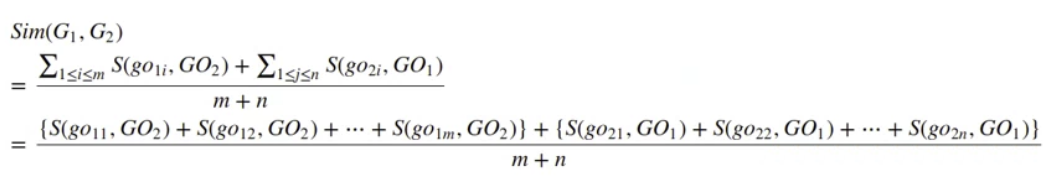

In [1]:
# 위의 구해진 값 0.37은 두 유전자 RGL3 와 HS1BP3 의 functional similarity

In [ ]:
# 코드 문제점 : 
# - 위에서 두 유전자 similarity 구하는데 약18분 걸려서 속도가 느림
# - 그래서 사용하려면, 코드 수정하든지, 더 빠른 언어로 작성해야 가능할 듯함